In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt



In [0]:
from sklearn.datasets import make_circles
np.random.seed(0)

X, y = make_circles(n_samples=1000, factor=.3, noise=0.15)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.30, random_state=42)

<Figure size 432x288 with 0 Axes>

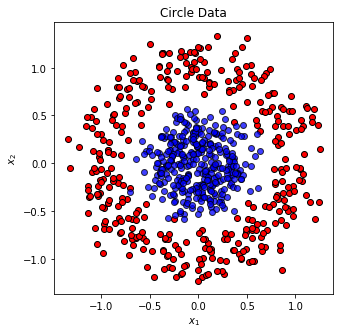

In [10]:
plt.figure()
plt.subplots(1,1,figsize=(5,5))
# plt.subplot(1,2,3, projection='polar')
plt.title("Circle Data")
reds = y_train == 0
blues = y_train == 1

plt.scatter(X_train[reds, 0], X_train[reds, 1] ,c="red",alpha=1 ,
             edgecolor='k')
plt.scatter(X_train[blues, 0], X_train[blues, 1], c="blue",alpha=0.75 ,
            edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, 
                                input_shape=(2,), 
                                activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

In [0]:
hist = model.fit(X_train, y_train, 
                 validation_data=(X_valid, y_valid), 
                 epochs=200, batch_size=2, verbose=0)

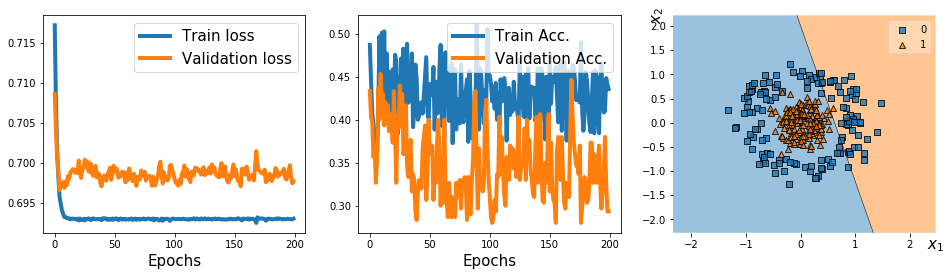

In [0]:
from mlxtend.plotting import plot_decision_regions

history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=X_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

Adding More Hidden Layers and Dropout Layers

In [0]:
tf.random.set_seed(1)

model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(units=4, input_shape=(2,), activation='relu'))
model_2.add(tf.keras.layers.Dense(units=4, activation='relu'))
model_2.add(tf.keras.layers.Dense(units=4, activation='relu'))
# model_2.add(tf.keras.layers.Dense(units=4, activation='relu'))
model_2.add(tf.keras.layers.Dropout(0.2))
model_2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model_2.summary()

## compile:
model_2.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_58 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_59 (Dense)             (None, 4)                 20        
_________________________________________________________________
dropout_16 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [0]:
%%time
## train:
hist_2 = model_2.fit(X_train, y_train, 
                 validation_data=(X_valid, y_valid), 
                 epochs=100, batch_size=2, verbose=0)

history = hist_2.history


CPU times: user 1min 21s, sys: 5.17 s, total: 1min 26s
Wall time: 1min 10s


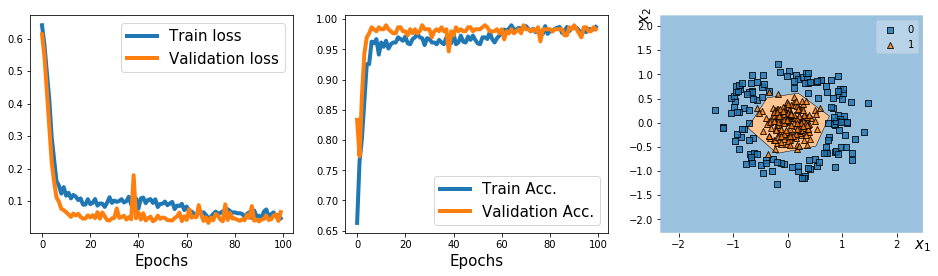

In [0]:
from mlxtend.plotting import plot_decision_regions

# history = hist_2.history
# Plot Train and Validation Loss
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

# Plot Train and Validation Accuracy
ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

# Plot Decision Regions
ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=X_valid, y=y_valid.astype(np.integer),
                      clf=model_2)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [0]:
score = model_2.evaluate(X_valid, y_valid, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score

300/300 - 0s - loss: 0.0662 - binary_accuracy: 0.9833
Test loss: 0.06622246359785398
Test accuracy: 0.98333335


[0.06622246359785398, 0.98333335]

**Model with Initializers**

In [83]:
model_init = tf.keras.Sequential(name='model_with_initializers')

model_init.add(tf.keras.layers.Dense(units=4, 
            activation=tf.keras.activations.relu,
            kernel_initializer=tf.keras.initializers.GlorotNormal(),
            bias_initializer=tf.keras.initializers.Constant(2.0)))
model_init.add(tf.keras.layers.Dense(units=32, 
            activation=tf.keras.activations.relu,
            kernel_initializer=tf.keras.initializers.GlorotNormal(),
            bias_initializer=tf.keras.initializers.Constant(2.0)))
model_init.add(tf.keras.layers.Dense(units=16, 
            activation=tf.keras.activations.relu,
            kernel_initializer=tf.keras.initializers.GlorotNormal(),
            bias_initializer=tf.keras.initializers.Constant(2.0)))
model_init.add(tf.keras.layers.Dense(units=1, 
            activation=tf.keras.activations.sigmoid,
            kernel_regularizer=tf.keras.regularizers.l1(l=0.01) ))
  
model_init.build(input_shape=(None,2))
model_init.summary()


Model: "model_with_initializers"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             multiple                  12        
_________________________________________________________________
dense_42 (Dense)             multiple                  160       
_________________________________________________________________
dense_43 (Dense)             multiple                  528       
_________________________________________________________________
dense_44 (Dense)             multiple                  17        
Total params: 717
Trainable params: 717
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_init.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.Accuracy(), 
             tf.keras.metrics.Precision(),
             tf.keras.metrics.Recall(),
             tf.keras.metrics.binary_accuracy,
          ] )

**Early** **Stopping**

In [112]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [0]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=4),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [0]:
EarlyStopping?

In [125]:
%%time
## train:
hist_init = model_init.fit(X_train, y_train, 
                 validation_data=(X_valid, y_valid), 
                 epochs=100, batch_size=2, callbacks=callbacks,verbose=2)

history_init = hist_init.history


Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 - 1s - loss: 0.0430 - accuracy: 0.0514 - precision_13: 0.9910 - recall_13: 0.9852 - binary_accuracy: 0.9886 - val_loss: 0.0607 - val_accuracy: 0.0633 - val_precision_13: 0.9816 - val_recall_13: 0.9816 - val_binary_accuracy: 0.9800
Epoch 2/100
700/700 - 1s - loss: 0.0454 - accuracy: 0.0486 - precision_13: 0.9911 - recall_13: 0.9911 - binary_accuracy: 0.9914 - val_loss: 0.0661 - val_accuracy: 0.0500 - val_precision_13: 0.9815 - val_recall_13: 0.9755 - val_binary_accuracy: 0.9767
Epoch 3/100
700/700 - 1s - loss: 0.0510 - accuracy: 0.0529 - precision_13: 0.9852 - recall_13: 0.9852 - binary_accuracy: 0.9857 - val_loss: 0.0586 - val_accuracy: 0.0467 - val_precision_13: 0.9938 - val_recall_13: 0.9816 - val_binary_accuracy: 0.9867
Epoch 4/100
700/700 - 1s - loss: 0.0441 - accuracy: 0.0414 - precision_13: 0.9940 - recall_13: 0.9852 - binary_accuracy: 0.9900 - val_loss: 0.0600 - val_accuracy: 0.0567 - val_precision_13: 0.9816 - va

In [115]:
score = model_init.evaluate(X_valid, y_valid, verbose=2)
score

300/300 - 0s - loss: 0.0617 - accuracy: 0.0367 - precision_13: 0.9937 - recall_13: 0.9693 - binary_accuracy: 0.9800


[0.06174484682579835, 0.036666665, 0.9937107, 0.9693251, 0.98]

In [120]:
tf.print(tf.reduce_mean(history_init['val_loss']))
tf.print(tf.reduce_mean(history_init['binary_accuracy']))

0.061957920769022574
0.990952432


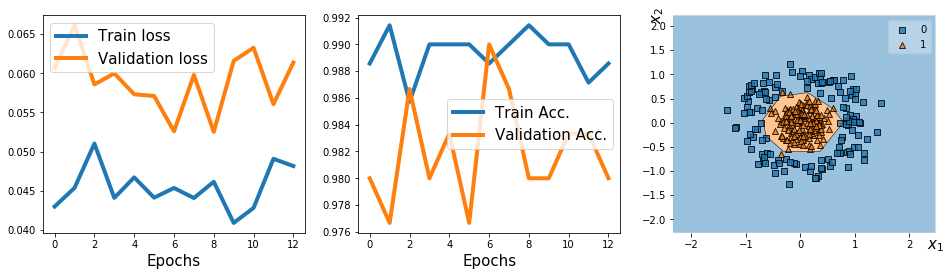

In [126]:
from mlxtend.plotting import plot_decision_regions

# history = hist_2.history
# Plot Train and Validation Loss
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history_init['loss'], lw=4)
plt.plot(history_init['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

# Plot Train and Validation Accuracy
ax = fig.add_subplot(1, 3, 2)
plt.plot(history_init['binary_accuracy'], lw=4)
plt.plot(history_init['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

# Plot Decision Regions
ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=X_valid, y=y_valid.astype(np.integer),
                      clf=model_init)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [118]:
!ls

best_model.h5  sample_data
